# Project Problem Statement 

## Customer Churn Prediction 
A Bank wants to take care of customer retention for its product: savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank.
Your task as a data scientist would be to predict the propensity to churn for each customer.

## Data Dictionary
There are multiple variables in the dataset which can be divided into 3 cataegories 

1. Demographic information about customers
    - Customer id 
    - vintage - Vintage of the customer with the bank in a number of days 
    - age - Age of customer 
    - gender - Gender of customer 
    - dependents - Number of dependents 
    - occupation - Occupation of the customer 
    - city - City of the customer (anonymized) 
2. Customer Bank Relationship
    - customer_nw_category - Net worth of customer (3: Low 2: Medium 1: High) 
    - branch_code - Branch Code for a customer account 
    - days_since_last_transaction - No of Days Since Last Credit in Last 1 year  
3. Transactional Information
    - current_balance - Balance as of today 
        --previous_month_end_balance - End of Month Balance of previous month 
    - average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter 
    - average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to the previous quarter 
    - current_month_credit - Total Credit Amount current month 
    - previous_month_credit - Total Credit Amount previous month 
    - current_month_debit - Total Debit Amount current month 
    - previous_month_debit - Total Debit Amount previous month 
    - current_month_balance - Average Balance of current month 
    - previous_month_balance - Average Balance of previous month 
    - churn - Average balance of customer falls below minimum balance in the next quarter (1/0) 


 ###  Aim : To predict the propensity of churn for each customer 
 
 #### Hypothesis : Should depend on current balance , debit and credit of the customer 

In [1]:
##################################################################
# Importing the libraries 
##################################################################


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## Reading the data 

In [3]:
data = pd.read_csv('churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [7]:
data.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


# Data Exploration

## Univariate Analysis 

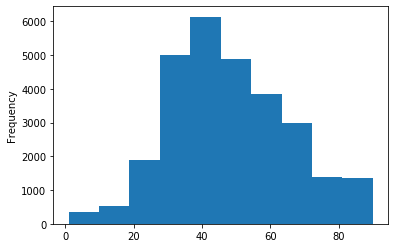

In [8]:
data['age'].plot.hist()

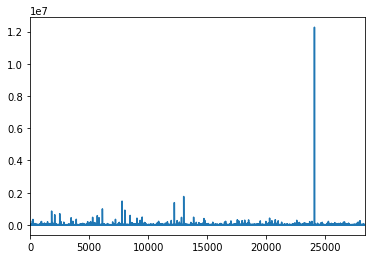

In [9]:
data['current_month_credit'].plot()

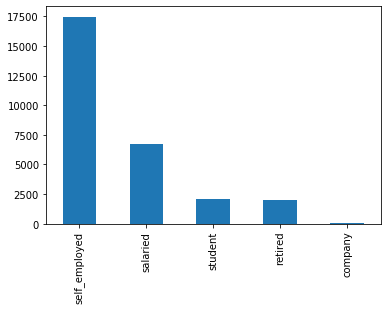

In [10]:
(data['occupation'].value_counts()).plot.bar()

- Self Emplyed peoples are more

In [11]:
data['occupation'].value_counts()/len(data['occupation'])

self_employed    0.615742
salaried         0.236206
student          0.072511
retired          0.071313
company          0.001409
Name: occupation, dtype: float64

In [12]:
data['dependents'].value_counts()/len(data['dependents'])

0.0     0.755232
2.0     0.075752
1.0     0.049151
3.0     0.024699
4.0     0.006307
5.0     0.001445
6.0     0.000282
7.0     0.000106
36.0    0.000035
52.0    0.000035
25.0    0.000035
9.0     0.000035
50.0    0.000035
32.0    0.000035
8.0     0.000035
Name: dependents, dtype: float64

- it can be made a catagorical valirable 

In [13]:
data['customer_nw_category'].value_counts()/len(data['customer_nw_category'])

2    0.512966
3    0.356282
1    0.130752
Name: customer_nw_category, dtype: float64

- We can see that, person lying under level 2 (medium net worth ) is high 
- Person having high net worth is only 13.07 percent 

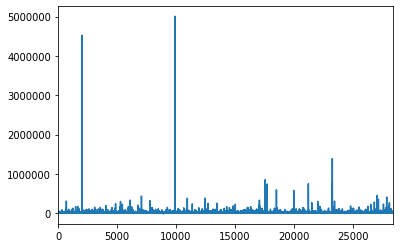

In [14]:
data['average_monthly_balance_prevQ2'].plot()

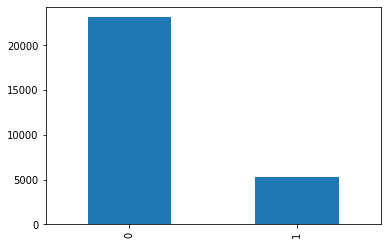

In [15]:
(data['churn'].value_counts()).plot(kind='bar')

In [16]:
data['churn'].value_counts()/len(data)

0    0.814671
1    0.185329
Name: churn, dtype: float64

- We can see 18.5 percent of customers are likely to churn 

# Data Manipulation 

In [17]:
data.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [18]:
data.shape

(28382, 21)

## Missing Values 

In [19]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

- Gender 
- Dependents
- Occupation 
- City 
- days_since last transcation 

In [20]:
data.groupby(['city','branch_code'])['churn'].value_counts()

city    branch_code  churn
0.0     647          0        1
        1348         0        8
                     1        3
        3555         0        1
        3891         0        1
                             ..
1648.0  1395         1        1
        2707         1        1
        2941         0        1
        3163         0        2
1649.0  1643         1        1
Name: churn, Length: 7695, dtype: int64

In [21]:
data.groupby('city')['branch_code'].value_counts()

city    branch_code
0.0     1348           11
        647             1
        3555            1
        3891            1
        3892            1
                       ..
1648.0  935             1
        1395            1
        2707            1
        2941            1
1649.0  1643            1
Name: branch_code, Length: 5925, dtype: int64

In [22]:
a = data['branch_code'].unique()

In [23]:

tmp = pd.DataFrame({
    'branch_code':data['branch_code'],
    'city':data['city']
},)

In [24]:
#tmp.dropna(axis=0,inplace=True)
tmp.drop_duplicates(subset='branch_code')

,branch_code,city
0,755,187.0
1,3214,NaN
2,41,146.0
3,582,1020.0
4,388,1494.0
...,...,...
28006,3022,1077.0
28096,2583,343.0
28268,3005,1167.0
28285,3133,905.0


In [25]:
tmp.city.isnull().sum()

803

In [26]:

count=0
for i in range(0,len(data)):
    if(pd.isnull(data['city'][i])==True):
        city = tmp.loc[data['branch_code'][i]]
        data['city'][i]=city['city']
        
        

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [27]:
data['city'].mode()

0    1020.0
dtype: float64

In [28]:
for i in range(0,len(data)):
    if(pd.isnull(data['city'][i])==True):
        data['city'][i]=1020

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### For gender

In [29]:
data['gender'].isnull().sum()

525

In [30]:
for i in range(0,len(data)):
    if(pd.isnull(data['gender'][i])==True):
        data['gender'][i]= 'Male'
data['gender'].value_counts()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Male      17073
Female    11309
Name: gender, dtype: int64

### For dependents 

In [31]:
data['dependents'].isnull().sum()

2463

In [32]:
data.groupby(['customer_nw_category','occupation'])['dependents'].value_counts()

customer_nw_category  occupation     dependents
1                     company        0.0             5
                      retired        0.0           201
                                     1.0            14
                                     2.0             7
                                     3.0             2
                                                  ... 
3                     self_employed  7.0             1
                                     9.0             1
                      student        0.0           520
                                     2.0             3
                                     1.0             2
Name: dependents, Length: 79, dtype: int64

- mostly dependendts are 0 

In [33]:
for i in range(len(data)):
    if(pd.isnull(data['dependents'][i])==True):
        data['dependents'][i]=0

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
data.dependents.isnull().sum()

0

### For occupaition 

In [35]:
data.loc[data['age']>20].groupby(['occupation']).current_balance.mean()

occupation
company          8428.421795
retired          6441.061838
salaried         7440.316106
self_employed    7641.738900
student          4949.679352
Name: current_balance, dtype: float64

- we can see students have less current balance

In [36]:
for i in range(len(data)):
    if(pd.isnull(data['occupation'][i])==True):
        if(data['age'][i]<20):
            data['occupation'][i]='student'
        else:
            if((data['age'][i]>70 ) and (data['current_balance'][i]< 7000)):
                 data['occupation'][i]='retired'
            elif (data['current_balance'][i]> 7000):
                 data['occupation'][i]='company'
            else:
                 data['occupation'][i]='self_employed'
            
                
data['occupation'].isnull().sum()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0

### Days Since Last Transaction

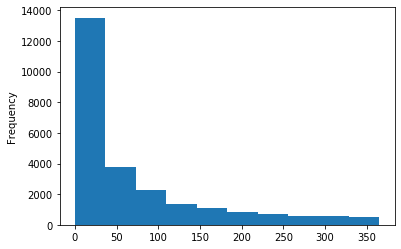

In [37]:
data['days_since_last_transaction'].plot(kind='hist')

In [38]:
tmp = data[['days_since_last_transaction','previous_month_credit','previous_month_debit','current_month_credit',
           'current_month_debit']]

In [39]:
tmp.loc[tmp['days_since_last_transaction']>30].head(10)

,days_since_last_transaction,previous_month_credit,previous_month_debit,current_month_credit,current_month_debit
0,224.0,0.20,0.20,0.20,0.20
1,60.0,0.56,100.56,0.56,5486.27
3,147.0,0.47,2143.33,0.47,0.47
4,58.0,714.61,1538.06,0.33,588.62
5,60.0,0.36,286.07,0.36,857.50
6,98.0,0.64,439.26,0.64,1299.64
7,172.0,0.27,5688.44,0.27,443.13
12,47.0,500.33,508.53,0.33,5098.90
13,303.0,0.61,2529.75,0.61,1748.08
14,52.0,661.73,2811.53,0.66,0.66


- we can se for days_since_last_transaction > 60  -- preivious_month_credit and current_month_credit are nearly zero
- for days_since_last_transaction < 30 -- current month credit is not zero 
- for days_since_last_transaction btw 30 and 60  -- previous month credit is not zero 

In [40]:
data['days_since_last_transaction'].isnull().sum()

3223

In [41]:
## creating a new column 
tmp['last_transaction_days'] = ''
for i in range(len(tmp)):
    if(tmp['days_since_last_transaction'][i]<30):
        tmp['last_transaction_days'][i] = 'few days'
    elif(tmp['days_since_last_transaction'][i] <60):
        tmp['last_transaction_days'][i] = 'more than one months'
    elif(tmp['days_since_last_transaction'][i] >=60):
        tmp['last_transaction_days'][i] = 'more than two months'
tmp.head(10)
        

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self

,days_since_last_transaction,previous_month_credit,previous_month_debit,current_month_credit,current_month_debit,last_transaction_days
0,224.0,0.20,0.20,0.20,0.20,more than two months
1,60.0,0.56,100.56,0.56,5486.27,more than two months
2,NaN,0.61,259.23,0.61,6046.73,
3,147.0,0.47,2143.33,0.47,0.47,more than two months
4,58.0,714.61,1538.06,0.33,588.62,more than one months
5,60.0,0.36,286.07,0.36,857.50,more than two months
6,98.0,0.64,439.26,0.64,1299.64,more than two months
7,172.0,0.27,5688.44,0.27,443.13,more than two months
8,19.0,121.09,359.44,714.51,714.51,few days
9,0.0,4206.13,1348.85,6912.29,1887.30,few days


In [42]:
for i in range(len(tmp)):
    if(tmp['last_transaction_days'][i] ==''):
        if(tmp['current_month_credit'][i] <1):
            tmp['last_transaction_days'][i]= 'few days'
        elif(tmp['previous_month_credit'][i] <1):
            tmp['last_transaction_days'][i] = 'more than one months'
        else :
            tmp['last_transaction_days'][i] = 'more than two months'

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [43]:
tmp['last_transaction_days'].value_counts()

few days                15626
more than two months     8924
more than one months     3832
Name: last_transaction_days, dtype: int64

In [44]:
for i in range(len(tmp)):
    if(tmp['last_transaction_days'][i] =='few days'):
            tmp['days_since_last_transaction'][i]= 15
    elif(tmp['last_transaction_days'][i] == 'more than one months'):
            tmp['days_since_last_transaction'][i]= 45
    else : 
            tmp['days_since_last_transaction'][i] = 75

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [45]:
tmp['days_since_last_transaction'].isnull().sum()

0

In [46]:
data['last_transaction_days'] = tmp['last_transaction_days']
data['days_since_last_transaction'] = tmp['days_since_last_transaction']

- done 

In [47]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction_days
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,75.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,more than two months
1,2,310,35,Male,0.0,self_employed,762.0,2,3214,75.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,more than two months
2,4,2356,31,Male,0.0,salaried,146.0,2,41,15.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,few days
3,5,478,90,Male,0.0,self_employed,1020.0,2,582,75.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,more than two months
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,45.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,more than one months


### Changing data types

In [48]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction_days              object
dtype: object

In [49]:
data=data.astype({'customer_nw_category':'object'})

In [50]:
for i in range(len(data)):
    if(data['dependents'][i] >=5):
        data.dependents[i]='others'
data['dependents'].value_counts()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.0       23898
2.0        2150
1.0        1395
3.0         701
4.0         179
others       59
Name: dependents, dtype: int64

In [51]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction_days
0,1,3135,66,Male,0,self_employed,187.0,2,755,75.0,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,more than two months
1,2,310,35,Male,0,self_employed,762.0,2,3214,75.0,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,more than two months
2,4,2356,31,Male,0,salaried,146.0,2,41,15.0,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,few days
3,5,478,90,Male,0,self_employed,1020.0,2,582,75.0,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,more than two months
4,6,2531,42,Male,2,self_employed,1494.0,3,388,45.0,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,more than one months


# Bivariate Analysis
- Traget - churn 

### Analysis b/w churn and last_transaction_days 

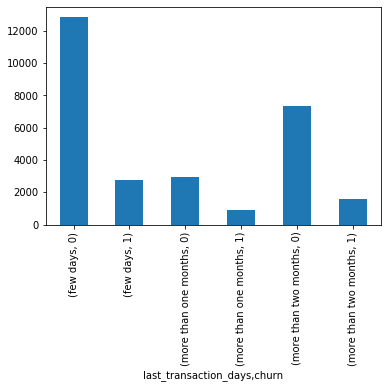

In [52]:
fig,ax = plt.subplots()
tmp = data.groupby(['last_transaction_days'])['churn'].value_counts()
tmp.plot(kind='bar')

In [53]:
data.groupby(['last_transaction_days'])['churn'].value_counts().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

last_transaction_days  churn
few days               0        82.151542
                       1        17.848458
more than one months   0        76.826722
                       1        23.173278
more than two months   0        82.261318
                       1        17.738682
Name: churn, dtype: float64

- we can clearly see than person with active transaction have less chance to churn than the person who havnt made a transaction for more than a month 
- while person who havn't made any transactions from more than two months (i.e, customers which are not active ) are less likely to churn compared to both groups

## Churn and vintage

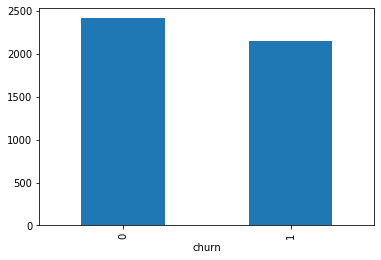

In [54]:
fig,ax = plt.subplots()
temp = data.groupby(['churn']).vintage.mean()
temp.plot(kind = 'bar', stacked = True)

## Analysis b/w churn and customer_nw_category

In [55]:
pd.crosstab(data['churn'], data['customer_nw_category'],values=data.churn,aggfunc='count')

customer_nw_category,1,2,3
churn,,,
0,3001,11953,8168
1,710,2606,1944


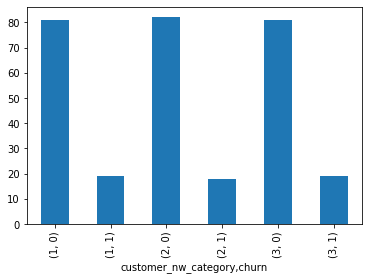

In [56]:
temp = data.groupby(['customer_nw_category']).churn.value_counts()
temp = temp.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
temp.plot(kind = 'bar')

## Based  On gender 

In [57]:
(data.groupby(['gender'])['churn'].value_counts()).groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

gender  churn
Female  0        82.447608
        1        17.552392
Male    0        80.817665
        1        19.182335
Name: churn, dtype: float64

- 19 percent of males and 17.5 percent of females are likely to churn 

## Analysis of person who churns based on gender and customer_nw_category

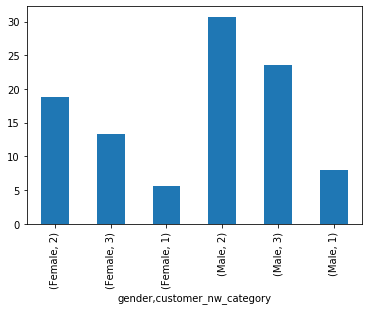

In [58]:
tmp = (data[data.churn == 1].groupby(['gender'])['customer_nw_category'].value_counts())*100/len(data[data.churn == 1])
tmp.plot(kind = 'bar')

- we can clearly see that category 2 have higher chances to churn both in male and female 

In [59]:
tmp = (data[data.churn == 1].groupby(['gender'])['last_transaction_days'].value_counts()).groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
tmp

gender  last_transaction_days
Female  few days                 50.528967
        more than two months     32.392947
        more than one months     17.078086
Male    few days                 54.534351
        more than two months     28.702290
        more than one months     16.763359
Name: last_transaction_days, dtype: float64

- from total females who churn, 50 percent are those who have made an transcation within few days and 32 percent are those who have made an transaction more than two months ago
- same thing happens for male as well

## Analysis b/w churn , last_transaction_days and average_monthly_balance_prevQ

In [60]:
data.pivot_table(values='average_monthly_balance_prevQ',index='churn',columns='last_transaction_days',aggfunc='mean')

last_transaction_days,few days,more than one months,more than two months
churn,,,
0,7639.202243,7020.758240,6688.921996
1,8926.398347,8184.770687,8068.778699


- we can clealy see that,person having high average_monthly_balance in previous quater are more likely to churn 

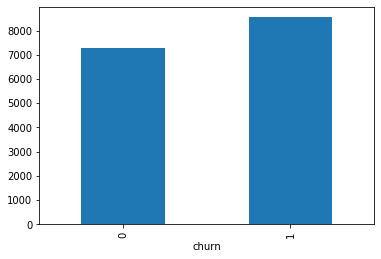

In [61]:
tmp = data.groupby(['churn'])['average_monthly_balance_prevQ'].mean()
tmp.plot(kind='bar')

- same result as above 

In [62]:
data.pivot_table(values='vintage',index='churn',columns='last_transaction_days',aggfunc='mean')

last_transaction_days,few days,more than one months,more than two months
churn,,,
0,2515.725637,2392.475883,2244.665849
1,2256.506275,2149.586712,1949.751737


- we can see mean vintage of person who churn is less in all the three categories of last_transaction_days

In [63]:
tmp = pd.DataFrame({
    'count':data['occupation'].value_counts(),
#     'occupation':data['occupation'].unique()
})
tmp

,count
self_employed,17518
salaried,6704
student,2058
retired,2035
company,67


In [64]:
a = data.groupby('occupation')['churn'].value_counts().groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
a
# data.pivot_table(columns=['churn'],index=data.occupation.values,values = 'occupation',aggfunc='count')

occupation     churn
company        0        89.552239
               1        10.447761
retired        0        84.963145
               1        15.036855
salaried       0        82.890811
               1        17.109189
self_employed  0        80.157552
               1        19.842448
student        0        84.256560
               1        15.743440
Name: churn, dtype: float64

## Analysis b/w person who churns and occupation

In [65]:
tmp = pd.DataFrame({
    'percentage churn':data[data['churn'] == 1]['occupation'].value_counts()*100/len(data[data['churn'] == 1]),
#     'occupation':data[data['churn'] == 1]['occupation'].unique()
})
tmp
# data[data['churn'] == 1]['occupation'].value_counts()

,percentage churn
self_employed,66.083650
salaried,21.806084
student,6.159696
retired,5.817490
company,0.133080


- we can see that person whose occupation is self-employed have higher chances to churn, compare to other groups
- among the people who churn , companies are less likely to do it 

In [66]:
data.pivot_table(values='last_transaction_days',index='churn',columns='occupation',aggfunc='count')
data[data['occupation'] == 'company'].groupby('churn')['occupation'].value_counts()/len(data[data['occupation'] == 'company'])

churn  occupation
0      company       0.895522
1      company       0.104478
Name: occupation, dtype: float64

In [67]:
for i in data['occupation'].unique() :
    print('#################################################################################')
    print(data[data['occupation'] == i].groupby('churn')['occupation'].value_counts()/len(data[data['occupation'] == i]))

#################################################################################
churn  occupation   
0      self_employed    0.801576
1      self_employed    0.198424
Name: occupation, dtype: float64
#################################################################################
churn  occupation
0      salaried      0.828908
1      salaried      0.171092
Name: occupation, dtype: float64
#################################################################################
churn  occupation
0      retired       0.849631
1      retired       0.150369
Name: occupation, dtype: float64
#################################################################################
churn  occupation
0      student       0.842566
1      student       0.157434
Name: occupation, dtype: float64
#################################################################################
churn  occupation
0      company       0.895522
1      company       0.104478
Name: occupation, dtype: float64


- we can clearly see that only 10 percent companies churn 

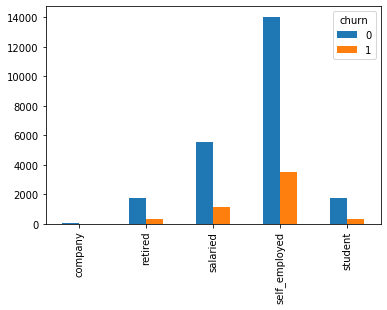

In [68]:
tmp = data.pivot_table(columns=['churn'],index=data.occupation.values,values = 'occupation',aggfunc='count')

tmp.plot(kind='bar')



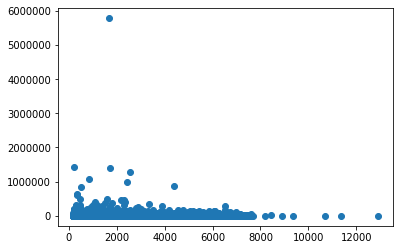

In [69]:
plt.scatter(data['vintage'],data['current_month_balance'])

In [70]:
data.pivot_table(values='current_balance',index='churn',columns='last_transaction_days',aggfunc='mean')

last_transaction_days,few days,more than one months,more than two months
churn,,,
0,8705.219386,7446.824049,6585.018186
1,5619.122904,4582.591667,4877.306601


In [71]:
data.pivot_table(values='current_balance',index='churn',columns='customer_nw_category',aggfunc='mean')

customer_nw_category,1,2,3
churn,,,
0,13856.883036,8200.461403,5192.011339
1,8770.199014,5813.913599,3129.604624


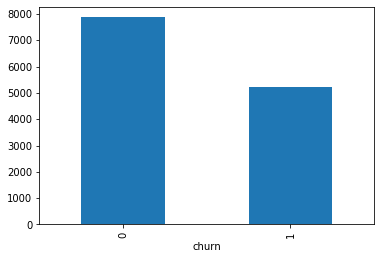

In [72]:
# data.plot(kind = 'bar',x = 'churn',y = 'current_balance')
tmp = data.groupby(['churn'])['current_balance'].mean()
tmp.plot(kind = 'bar')

- we can clearly see that person with low current balance are likely to churn 

## From our observation we can see few points 
- we can see that person whose occupation is self-employed have higher chances to churn, compare to other groups
- we can clearly see that only 10 percent companies churn
- we can see mean vintage of person who churn is less in all the three categories of last_transaction_days
- we can clealy see that,person having high average_monthly_balance in previous quater are more likely to churn

# Preprocessing 

In [73]:
df = pd.get_dummies(data)
df.shape , data.shape

((28382, 36), (28382, 22))

In [74]:
df.isnull().sum()

customer_id                                   0
vintage                                       0
age                                           0
city                                          0
branch_code                                   0
days_since_last_transaction                   0
current_balance                               0
previous_month_end_balance                    0
average_monthly_balance_prevQ                 0
average_monthly_balance_prevQ2                0
current_month_credit                          0
previous_month_credit                         0
current_month_debit                           0
previous_month_debit                          0
current_month_balance                         0
previous_month_balance                        0
churn                                         0
gender_Female                                 0
gender_Male                                   0
dependents_0.0                                0
dependents_1.0                          

# Model Building

In [75]:
# seperating dependent and independent data 
x = df.drop(['churn'],axis=1)
y = df['churn']

## Implementing knn 


In [76]:
# log transformation and scaling using Standardscaler for dealing with outliers
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
num_cols = [ 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_cols:
    x[i] = np.log(x[i] + 17000)
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled,columns=x.columns)

In [77]:
# tts
from sklearn.model_selection import train_test_split as tts
Train_x ,test_x ,Train_y,test_y = tts(x,y,stratify=y,random_state=102,test_size=0.2)
Train_x.shape,Train_y.shape

((22705, 35), (22705,))

In [78]:
# tts for validation 
train_x ,valid_x ,train_y,valid_y = tts(Train_x,Train_y,random_state=102,test_size=0.2)
test_y.shape

(5677,)

In [79]:
#implement knn 
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score , f1_score,roc_auc_score

In [80]:
clf = KNN(n_neighbors=11)
clf.fit(train_x,train_y)
pred_y =clf.predict_proba(train_x)[:,1]
roc_auc_score(train_y,pred_y)

0.8168195315619795

In [81]:
# for valid set 
pred_valid =clf.predict_proba(valid_x)[:,1]
roc_auc_score(valid_y,pred_valid)

0.643578614886444

In [82]:
# lets check its elbow curve 
def Elbow(K):
    valid_error = []
    train_error = []
    
    # training 
    for i in K:
        # instance of KNN
        clf = KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        # appending 
        temp = clf.predict_proba(valid_x)[:,1]
        temp = roc_auc_score(valid_y,temp)
        error = 1-temp
        valid_error.append(error)
        temp = clf.predict_proba(train_x)[:,1]
        temp = roc_auc_score(train_y,temp)
        error = 1-temp
        train_error.append(error)
    
    return train_error,valid_error

In [83]:
# def k 
k = range(16,22,2)


In [84]:
train_e,valid_e = Elbow(k)

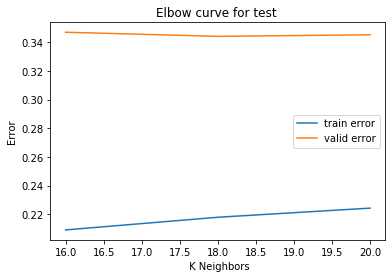

In [85]:
#plotting 
plt.xlabel(' K Neighbors')
plt.ylabel('Error')
plt.plot(k,train_e,label='train error')
plt.plot(k,valid_e,label='valid error')
plt.title('Elbow curve for test ')
plt.legend()

- hence lets take k as 18 

In [86]:
clf = KNN(n_neighbors=18)
clf.fit(train_x,train_y)
pred_y =clf.predict_proba(test_x)[:,1]
valid_pred = clf.predict_proba(valid_x)[:,1]
roc_auc_score(test_y,pred_y) , roc_auc_score(valid_y,valid_pred),len(pred_y),roc_auc_score(train_y,clf.predict_proba(train_x)[:,1])

(0.6522736614941939, 0.6558426925419808, 5677, 0.7821335158743299)

In [87]:
#print(roc_auc_score(train_y,clf.predict_proba(train_x)[:,1]))
from sklearn.metrics import classification_report as cr
print(cr(test_y,clf.predict(test_x)))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4625
           1       0.69      0.03      0.06      1052

    accuracy                           0.82      5677
   macro avg       0.75      0.51      0.48      5677
weighted avg       0.79      0.82      0.74      5677



In [88]:
predKnn=pred_y

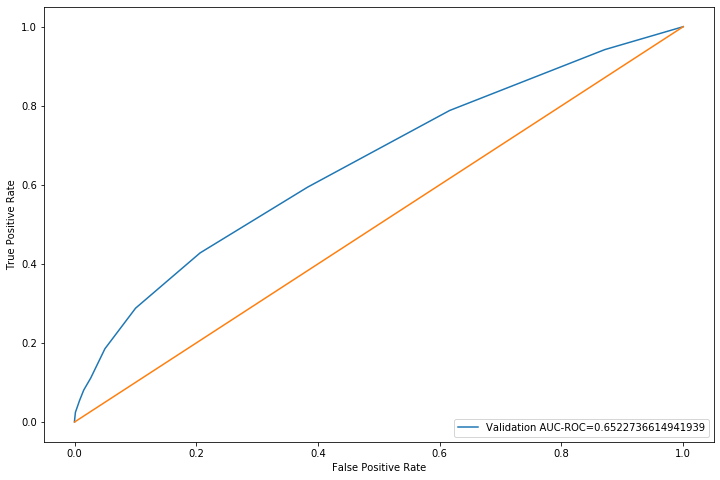

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_y,pred_y) 
auc = roc_auc_score(test_y, pred_y) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc)) 
line = np.linspace(0, 1, 1000)
plt.plot(line,line, linestyle='-')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

# Logistic Regression Model 

In [90]:
from sklearn.linear_model import LogisticRegression as LR
model_lr = LR()
model_lr.fit(train_x,train_y)
lr_valid=model_lr.predict_proba(valid_x)[:,1]
lr_pred=model_lr.predict_proba(test_x)[:,1]

In [91]:
print("Validation Score",roc_auc_score(valid_y,lr_valid))
print("Train_Score",roc_auc_score(train_y,model_lr.predict_proba(train_x)[:,1]))
print("Test Score",roc_auc_score(test_y,lr_pred))

Validation Score 0.7983608437345092
Train_Score 0.7977048249586868
Test Score 0.8032792107697051


- we can see we are getting roc-score of 0.80 for test 

In [92]:
print(cr(test_y,model_lr.predict(test_x)))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      4625
           1       0.70      0.21      0.32      1052

    accuracy                           0.84      5677
   macro avg       0.77      0.59      0.61      5677
weighted avg       0.82      0.84      0.80      5677



# Lets now build a decision treee

In [93]:
valid_y.value_counts(normalize=True)

0    0.804448
1    0.195552
Name: churn, dtype: float64

In [94]:
#3 Descision Tree
from sklearn.tree import DecisionTreeClassifier as DT
dt_model = DT(random_state=102)

In [95]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=102, splitter='best')

In [96]:
pred_y=dt_model.predict_proba(train_x)[:,1]
print(roc_auc_score(train_y,pred_y))

1.0


In [97]:
pred_y=dt_model.predict_proba(valid_x)[:,1]
print(roc_auc_score(valid_y,pred_y))

0.6602880083751971


- model overfits

# Optimizing Performance

In [98]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,30):
    dt_model = DT(max_depth=depth,random_state=10,max_features=12)
    dt_model.fit(train_x,train_y)
    train_accuracy.append(roc_auc_score(train_y,dt_model.predict_proba(train_x)[:,1]))
    validation_accuracy.append(roc_auc_score(valid_y,dt_model.predict_proba(valid_x)[:,1]))

In [99]:
frame = pd.DataFrame({
    'max_depth':range(1,30),
    'train_acc':train_accuracy,
    'valid_acc':validation_accuracy
})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.608515,0.608133
1,2,0.621663,0.623838
2,3,0.682975,0.676174
3,4,0.766206,0.765778
4,5,0.792730,0.794577


No handles with labels found to put in legend.


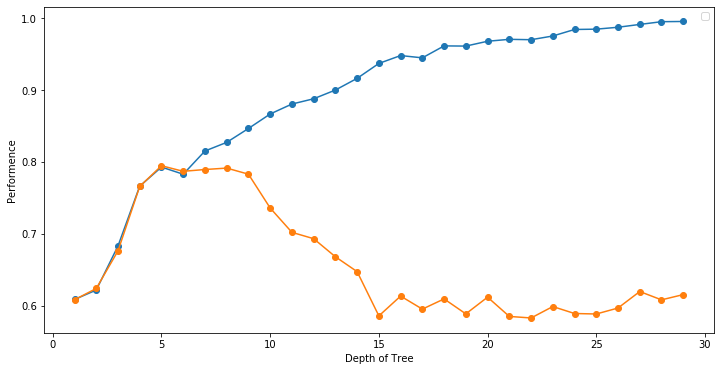

In [100]:
## Plotting 
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker = 'o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker = 'o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performence')
plt.legend()

- we can select k as 5

In [101]:
dt_model = DT(max_depth=5,max_features=10,random_state=12)
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12, splitter='best')

In [102]:
roc_auc_score(valid_y,dt_model.predict_proba(valid_x)[:,1])

0.7814966965322836

In [103]:
predDt =dt_model.predict_proba(test_x)[:,1]
roc_auc_score(test_y,predDt)

0.7627493577227419

- model is performing well 

In [104]:
from sklearn import tree

In [105]:
!pip install graphviz

In [106]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=train_x.columns,max_depth=2,filled=True)

In [107]:
# saving dot into ong format
!dot -Tpng tree.dot -o tree.png

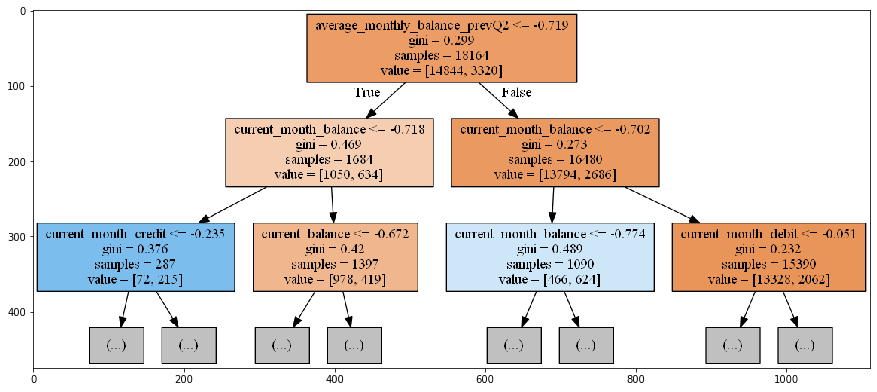

In [108]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [134]:
pred=dt_model.predict(test_x)
print(cr(test_y,pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4625
           1       0.65      0.29      0.40      1052

    accuracy                           0.84      5677
   macro avg       0.75      0.63      0.65      5677
weighted avg       0.82      0.84      0.81      5677



In [135]:
confusion_matrix(test_y,pred)

array([[4462,  163],
       [ 747,  305]], dtype=int64)

## Ensemble model

- we can ensemble the three models - Knn , Logistic Regression and decision tree 

In [110]:
print(roc_auc_score(test_y,predDt))
print(roc_auc_score(test_y,lr_pred))
print(roc_auc_score(test_y,predKnn))

0.7627493577227419
0.8032792107697051
0.6522736614941939


In [111]:
from statistics import mode,mean
final_pred = np.array([])
for i in range(len(test_x)):
    final_pred = np.append(final_pred,mean([predDt[i],predKnn[i],lr_pred[i]]))
roc_auc_score(test_y,final_pred)

0.8040425444455862

In [112]:
prob_Dt = dt_model.predict_proba(test_x)[:,1]
prob_Knn  =clf.predict_proba(test_x)[:,1]
prob_lr = model_lr.predict_proba(test_x)[:,1]

In [113]:
prob_Dt,prob_Knn,prob_lr

(array([0.07123621, 0.31503842, 0.07123621, ..., 0.07123621, 0.07123621,
        0.19596542]),
 array([0.16666667, 0.11111111, 0.16666667, ..., 0.22222222, 0.05555556,
        0.05555556]),
 array([0.18597553, 0.23768456, 0.16277485, ..., 0.21919113, 0.14997434,
        0.02540694]))

In [114]:
final_prob = np.array([])
for i in range (0,len(test_x)):
    final_prob = np.append(final_prob,mean([prob_Dt[i],prob_Knn[i],prob_lr[i]]))
final_prob

array([0.1412928 , 0.22127803, 0.13355924, ..., 0.17088319, 0.09225537,
       0.0923093 ])

In [115]:
print(roc_auc_score(test_y,prob_Dt))
print(roc_auc_score(test_y,prob_Knn))
print(roc_auc_score(test_y,prob_lr))
roc_auc_score(test_y,final_prob)
  

0.7627493577227419
0.6522736614941939
0.8032792107697051


0.8040425444455862

- we can see we are getting roc-aoc-score of 0.80 using ensemble model 

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier 
rft = RandomForestClassifier(random_state=102,max_depth=10,max_features=12,criterion='entropy',n_estimators=100)

In [117]:
rft.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=12, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=102,
                       verbose=0, warm_start=False)

In [118]:
roc_auc_score(train_y,rft.predict_proba(train_x)[:,1])

0.9173962219127114

In [119]:
roc_auc_score(valid_y,rft.predict_proba(valid_x)[:,1])

0.8469217575089462

In [120]:
prob_rft=rft.predict_proba(test_x)[:,1]
roc_auc_score(test_y,prob_rft)

0.833427808036173

In [121]:
rft.feature_importances_

array([2.27339955e-02, 3.26016893e-02, 2.08654405e-02, 1.89971928e-02,
       2.54416619e-02, 3.01510039e-03, 3.00230376e-01, 4.87576196e-02,
       7.02329239e-02, 5.36193386e-02, 2.80172790e-02, 3.14527395e-02,
       1.12390666e-01, 6.33940339e-02, 9.14230569e-02, 4.95684969e-02,
       1.91283573e-03, 2.05675339e-03, 1.71738555e-03, 1.28656412e-03,
       1.59458091e-03, 7.97445269e-04, 1.59476668e-04, 9.27796819e-05,
       8.10520979e-05, 1.09319060e-03, 1.85684946e-03, 2.19144184e-03,
       1.07051507e-03, 2.38440193e-03, 2.40667104e-03, 2.67030728e-03,
       1.50201688e-03, 1.11969130e-03, 1.26443053e-03])

In [136]:
pd.Series(rft.feature_importances_, index=train_x.columns)

customer_id                                   0.022734
vintage                                       0.032602
age                                           0.020865
city                                          0.018997
branch_code                                   0.025442
days_since_last_transaction                   0.003015
current_balance                               0.300230
previous_month_end_balance                    0.048758
average_monthly_balance_prevQ                 0.070233
average_monthly_balance_prevQ2                0.053619
current_month_credit                          0.028017
previous_month_credit                         0.031453
current_month_debit                           0.112391
previous_month_debit                          0.063394
current_month_balance                         0.091423
previous_month_balance                        0.049568
gender_Female                                 0.001913
gender_Male                                   0.002057
dependents

In [123]:
print(cr(test_y,rft.predict(test_x)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4625
           1       0.72      0.41      0.52      1052

    accuracy                           0.86      5677
   macro avg       0.80      0.69      0.72      5677
weighted avg       0.85      0.86      0.85      5677



- Hence we will use random forest model

In [124]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y,rft.predict(test_x))
print(cf)

[[4458  167]
 [ 620  432]]


# Comparing All the Models

In [125]:
acc_scores = []
models = ['Knn','DT','LR','RFT',"Ensemle"]
acc_scores.append(roc_auc_score(test_y,predKnn))
acc_scores.append(roc_auc_score(test_y,predDt))
acc_scores.append(roc_auc_score(test_y,lr_pred))
acc_scores.append(roc_auc_score(test_y,prob_rft))
acc_scores.append(roc_auc_score(test_y,final_prob))

In [126]:
m=pd.DataFrame({
    'models':models,
    'scores':acc_scores
})
m.head()

,models,scores
0,Knn,0.652274
1,DT,0.762749
2,LR,0.803279
3,RFT,0.833428
4,Ensemle,0.804043


<BarContainer object of 5 artists>

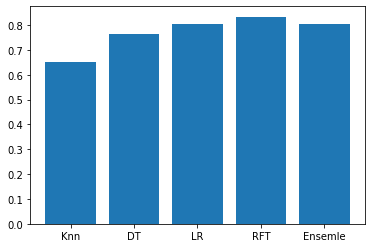

In [127]:
plt.bar(m.models,m.scores)

- We can see rft is the best model

<BarContainer object of 35 artists>

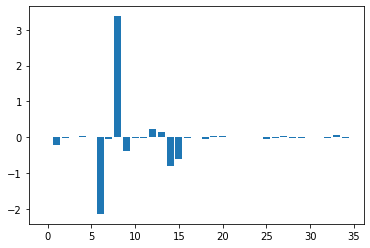

In [128]:
plt.bar(range(35),np.array(model_lr.coef_).reshape(-1))

# Instead of Hold-Out Validation Lets use cross Validation 


In [129]:
from sklearn.model_selection import KFold , StratifiedKFold ,cross_val_score
from sklearn.metrics import recall_score,precision_score

In [130]:
lr_scores = cross_val_score(LR(),X=x,y=y,cv=10,scoring="roc_auc")
print(lr_scores)
print(lr_scores.mean())

[0.8078878  0.79815853 0.78507325 0.80518077 0.8070852  0.79367279
 0.81201567 0.8099476  0.77630679 0.78500911]
0.798033751794916


In [131]:
dt_score=cross_val_score(DT(max_depth=5,max_features=10,random_state=12),X=x,y=y,cv=10,scoring="roc_auc")
print(dt_score)
print("Decision Tree Score:",dt_score.mean())

[0.76204919 0.77927    0.75180617 0.73785679 0.78798746 0.74060572
 0.75507971 0.76811963 0.74254962 0.7604094 ]
Decision Tree Score: 0.7585733687443776


In [132]:
rft_score=cross_val_score(RandomForestClassifier(random_state=102,max_depth=10,max_features=12,criterion='entropy',n_estimators=100)
                         ,X=x,y=y,cv=10,scoring='roc_auc')
print(rft_score)

[0.85262255 0.82818143 0.83671652 0.83715727 0.85125712 0.82116696
 0.8477188  0.85672372 0.83811113 0.8235952 ]


In [133]:
rft_score.mean()

0.8393250701500625

- Using Cross Validation we are getting an roc-auc of nearly 0.84 

# Using Xgboost 

In [482]:
!pip install xgboost
from xgboost import XGBClassifier

In [483]:
model = XGBClassifier(max_depth=5,random_state=101)
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [484]:
xgb_pred=model.predict_proba(valid_x)[:,1]
print(roc_auc_score(valid_y,xgb_pred))

0.829063117319345


In [485]:
xgb_pred=model.predict_proba(test_x)[:,1]
print(roc_auc_score(test_y,xgb_pred))

0.8192783886548146


In [486]:
xgb_score=cross_val_score(XGBClassifier( 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10),X=x,y=y,cv=5,scoring='roc_auc')
print(xgb_score)

[0.84407913 0.8386024  0.83838968 0.85082038 0.82963699]


In [487]:
xgb_score.mean()

0.8403057168676498

In [507]:
model.predict(test_x)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)